# NLP with the HF Transformers library

In [1]:
!pip install -q transformers tokenizers datasets torch accelerate evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
resume7_ds = load_dataset("ganchengguang/resume_seven_class")
resume7_df = resume7_ds["train"].to_pandas()

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
resume7_df[["label", "line_content"]] = resume7_df["text"].str.split("\t", expand=True)
resume7_df.head()

,text,label,line_content
0,Exp\tName: Abiral Pandey,Exp,Name: Abiral Pandey
1,PI\tEmail:,PI,Email:
2,PI\tPhone: 940-242-3303,PI,Phone: 940-242-3303
3,"PI\tCurrent Location: Woonsocket, Rhode Island",PI,"Current Location: Woonsocket, Rhode Island"
4,PI\tVisa Status: US Citizen,PI,Visa Status: US Citizen


In [5]:
resume7_df.groupby("label").head(3)

,text,label,line_content
0,Exp\tName: Abiral Pandey,Exp,Name: Abiral Pandey
1,PI\tEmail:,PI,Email:
2,PI\tPhone: 940-242-3303,PI,Phone: 940-242-3303
3,"PI\tCurrent Location: Woonsocket, Rhode Island",PI,"Current Location: Woonsocket, Rhode Island"
5,Sum\tSUMMARY:,Sum,SUMMARY:
6,Sum\tDynamic individual with 6 years of softwa...,Sum,Dynamic individual with 6 years of software de...
7,Sum\tExposure to all phases of Software Develo...,Sum,Exposure to all phases of Software Development...
29,Skill\tTECHNICAL SKILLS:,Skill,TECHNICAL SKILLS:
30,"Skill\tProgramming Languages: Java/J2EE, PL/SQ...",Skill,"Programming Languages: Java/J2EE, PL/SQL, Unix..."
31,"Skill\tJava/J2EE Technologies: JavaBeans, coll...",Skill,"Java/J2EE Technologies: JavaBeans, collections..."


<Axes: >

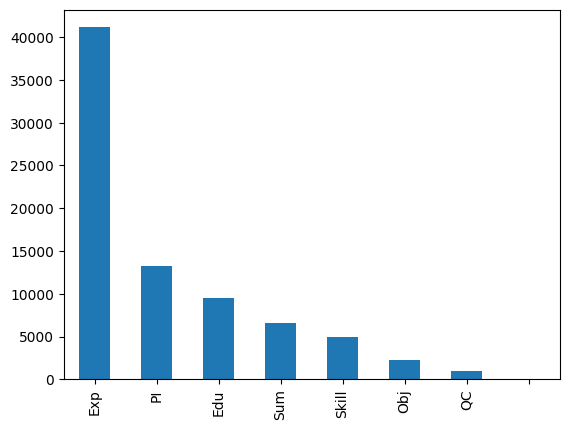

In [4]:
resume7_df["label"].value_counts().plot(kind="bar")

In [5]:
# Replace labels that we do not use
resume7_df = resume7_df.replace(to_replace=["PI", "Sum", "Obj", "QC"], value="Oth")

# Remove the empty rows
resume7_df = resume7_df.dropna(axis=0)

In [6]:
# Recompute labels
labels = resume7_df["label"].unique().tolist()
labels

['Exp', 'Oth', 'Skill', 'Edu']

<Axes: >

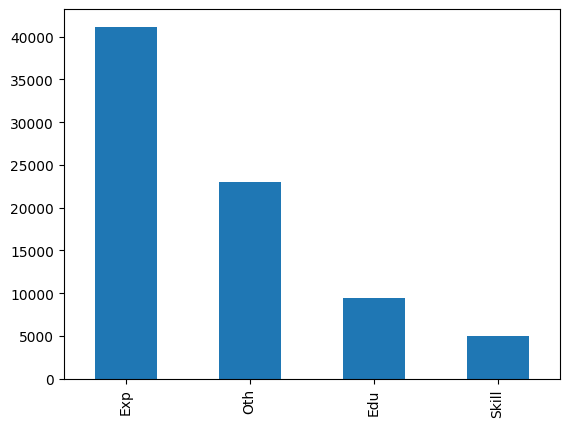

In [7]:
# Let's review the distribution of the labels
resume7_df["label"].value_counts().plot(kind="bar")

In [8]:
# Now let's simply retain the minimum number of samples per class label
min_samples = resume7_df["label"].value_counts().min()

resume7_df = resume7_df.groupby("label").apply(lambda x: x.sample(min_samples, random_state=42)).reset_index(drop=True)
resume7_df

,text,label,line_content
0,Edu\t72,Edu,72
1,Edu\t· Board: WBCHSE,Edu,· Board: WBCHSE
2,Edu\tQualification,Edu,Qualification
3,Edu\tEDUCATIONAL QUALIFICATION,Edu,EDUCATIONAL QUALIFICATION
4,Edu\t· Secondary Examination (C.B.S.E) in 2009...,Edu,· Secondary Examination (C.B.S.E) in 2009 from...
...,...,...,...
19891,Skill\tB Tech in Electronics and Instrumentation,Skill,B Tech in Electronics and Instrumentation
19892,Skill\t· Router: Basic Configuration and monit...,Skill,· Router: Basic Configuration and monitoring o...
19893,Skill\t Project Management,Skill,Project Management
19894,Skill\t A Clear Communicator,Skill,A Clear Communicator


In [9]:
resume7_df["label"].value_counts()

Edu      4974
Exp      4974
Oth      4974
Skill    4974
Name: label, dtype: int64

In [10]:
resume7_df["line_content"].apply(lambda x: len(x.split(" "))).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    19896.000000
mean         7.284731
std          8.758633
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
90%         16.000000
95%         22.000000
99%         40.000000
max        170.000000
Name: line_content, dtype: float64

In [12]:
from datasets import Dataset, ClassLabel

resume7_ds = Dataset.from_pandas(resume7_df[["line_content", "label"]], preserve_index=False)
resume7_ds = resume7_ds.class_encode_column("label")
resume7_ds = resume7_ds.train_test_split(test_size=0.2, stratify_by_column="label", seed=42)
resume7_ds

Casting to class labels:   0%|          | 0/19896 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['line_content', 'label'],
        num_rows: 15916
    })
    test: Dataset({
        features: ['line_content', 'label'],
        num_rows: 3980
    })
})

In [13]:
# Setting the label list
# def label2id(example):
#     example["label"] = ClassLabel.str2int(example["label"])
#     return example

# def id2label(example):
#     example["label"] = ClassLabel.int2str(example["label"])
#     return example

# resume7_ds["train"][0]

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from torch.utils.data import DataLoader

In [15]:
d = {}
for index, val in enumerate(resume7_ds["train"].features["label"].names):
  d[index] = val

print(d)

{0: 'Edu', 1: 'Exp', 2: 'Oth', 3: 'Skill'}


In [16]:
resume7_ds["train"][5]

{'line_content': 'Tableau, SQL, MS-Business intelligence, MS-EXCEL.',
 'label': 3}

In [53]:
labels = resume7_ds["train"].features["label"].names

model_name = "nghuyong/ernie-2.0-base-en"

model_config = AutoConfig.from_pretrained(model_name,
        num_labels=len(labels),
        label2id={label: idx for idx, label in enumerate(labels)},
        id2label={idx: label for idx, label in enumerate(labels)})
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name) #, config=model_config)

#tokenizer.padding_side = "left"
# Define PAD Token = EOS Token = 50256
#tokenizer.pad_token = tokenizer.eos_token

# resize model embedding to match new tokenizer
#model.resize_token_embeddings(len(tokenizer))

# fix model padding token id
#model.config.pad_token_id = model.config.eos_token_id

Some weights of ErnieForSequenceClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
# tokenize the resume7_ds dataset
resume7_ds = resume7_ds.map(lambda example: tokenizer(example["line_content"], truncation=True, padding="max_length", max_length=128), batched=True, batch_size=64)
resume7_ds.set_format("torch", columns=["input_ids", "attention_mask", "label"])
resume7_ds.remove_columns(["line_content"])
#train_data_loader = DataLoader(dataset=resume7_ds["train"], batch_size=32)
#test_data_loader = DataLoader(dataset=resume7_ds["test"], batch_size=32)

#next(iter(data_loader))

Map:   0%|          | 0/15916 [00:00<?, ? examples/s]

Map:   0%|          | 0/3980 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 15916
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 3980
    })
})

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support
import numpy as np
import torch
import evaluate

# Define Trainer parameters
def compute_metrics(p):
    logits, labels = p
    #print(f"Pred: {str(pred)}")

    #pred = torch.nn.functional.softmax(torch.Tensor(pred), dim=-1)
    #print(f"Pred probs: {str(pred)}")

    pred = np.argmax(logits, axis=-1)
    print(f"Pred labels: {str(pred[:20])}")

    print(f"TRUE labels: {str(labels[:20])}")

    acc_metric = evaluate.load("accuracy")
    acc = acc_metric.compute(predictions=pred, references=labels)

    #accuracy = accuracy_score(y_true=labels, y_pred=pred)
    #recall = recall_score(y_true=labels, y_pred=pred, average="micro")
    #precision = precision_score(y_true=labels, y_pred=pred, average="micro")
    #f1 = f1_score(y_true=labels, y_pred=pred, average="micro")

    #precision, recall, f1, _ = precision_recall_fscore_support(y_true=torch.Tensor(labels), y_pred=torch.Tensor(pred), average="micro")

    #return {"precision": precision, "recall": recall, "f1": f1}

    return acc

In [50]:
from transformers.trainer import Trainer, TrainingArguments
from transformers.trainer_callback import EarlyStoppingCallback

# Define Trainer
args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=7,
    eval_steps=10,
    seed=42,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    fp16_opt_level="O1"
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=resume7_ds["train"],
    eval_dataset=resume7_ds["test"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Train pre-trained model
trainer.train()


RuntimeError: ignored

In [35]:
trainer.save_model("/content/drive/My Drive/_workshop_models/ernie_83")

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
